<a href="https://colab.research.google.com/github/Moghees244/Android_Malware_Detection_System/blob/main/Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Android Malware Detection Using Decision Trees**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

**Reading Dataset**

In [4]:
# Load datasets
dataset = pd.read_csv('/content/Dataset.csv', header = None)

X = dataset.iloc[1:,1:-1]
y = dataset.iloc[1:,-1]


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=104, test_size=0.3, shuffle=True)

print("X_train Shape : " + str(X_train.shape))
print("Y_train Shape : " + str(y_train.shape))

print("X_test Shape : " + str(X_test.shape))
print("Y_test Shape : " + str(y_test.shape))

X_train Shape : (4894, 175)
Y_train Shape : (4894,)
X_test Shape : (2098, 175)
Y_test Shape : (2098,)


<ipython-input-4-594527322a61>:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv('/content/Dataset.csv', header = None)


**Training Model**

In [3]:
# The model was overfitting with default values so doing pre-pruning
params = {
    'criterion': ["gini", "entropy"],
    'max_depth': range(10, 20),
    'min_samples_split': range(5, 20),
    'min_samples_leaf': range(3, 20)
}

classifier = GridSearchCV(DecisionTreeClassifier(), params, cv=5)
classifier.fit(X_train, y_train)

print("Best Params : ", classifier.best_params_)
print("Model's Accuracy on Training Set : ", classifier.score(X_train, y_train) * 100)

Best Params :  {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 3, 'min_samples_split': 8}
Model's Accuracy on Training Set :  99.01920719248058


In [5]:
# The best parameters received from above code are used here
classifier = DecisionTreeClassifier(criterion="gini",max_depth=11, min_samples_leaf=3, min_samples_split=8)
classifier.fit(X_train, y_train)

print("Model's Accuracy on Training Set : ", classifier.score(X_train, y_train) * 100)

Model's Accuracy on Training Set :  99.01920719248058


**Evaluating Model**

Model's Accuracy on Test Set :  98.09342230695901


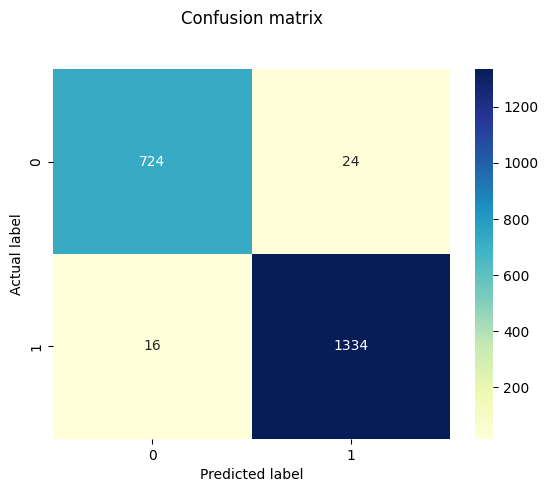

In [6]:
# Predicting
y_pred = classifier.predict(X_test)

# Evaluation
cf_matrix = confusion_matrix(y_test, y_pred)

# Confusion Metrix Graph
sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Accuracy
accuracy = accuracy_score(y_test,y_pred)
print("Model's Accuracy on Test Set : ", accuracy * 100)